# Exploratory Data Analysis
## Rancang Bangun Jaringan Saraf Tiruan untuk Sistem Kendali Lingkungan

Ridhan Fadhilah
15/384859/TK/43521

### 1. Mengimpor pustaka yang diperlukan untuk EDA

In [1]:
# Mengimpor pustaka-pustaka yang dibutuhkan
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

### 2. Memuat data ke dalam DataFrame.

In [2]:
# Menampilkan berkas-berkas data
from subprocess import check_output
print(check_output(["ls", "../Data"]).decode("utf8"))

data1Mar.xlsx
data2Jun.xlsx
data3Sep.xlsx
data4Des.xlsx
dataAll.xlsx
dataEDA.csv
DataFormat.xlsx
Data Simulasi IESVE (1-60).xlsx
Data Simulasi IESVE (61-80).xlsx
Data Simulasi IESVE (81-100).xlsx
Data Training ANN (1-60).xlsx
Data Training ANN (61-80).xlsx
Data Training ANN (81-100).xlsx
Data Training ANN Gabung (1-100).xlsx



In [3]:
# Memasukkan dataset ke dalam jupyter.
data = pd.read_excel('../Data/data2Jun.xlsx')

In [4]:
# Menampilkan 5 data teratas
data.head()

,No,Variation,Month,Time,Heater,AC,DrybulbT,Radiation,AirT,RH
0,1,DT002,Jun,00:03:00,0,0,24.13,0.0,24.53,65.12
1,2,DT002,Jun,00:09:00,0,0,24.13,0.0,24.53,65.22
2,3,DT002,Jun,00:15:00,0,0,24.13,0.0,24.52,65.31
3,4,DT002,Jun,00:21:00,0,0,24.13,0.0,24.52,65.41
4,5,DT002,Jun,00:27:00,0,0,24.13,0.0,24.51,65.51


In [5]:
# Menampilkan 5 data terbawah
data.tail()

,No,Variation,Month,Time,Heater,AC,DrybulbT,Radiation,AirT,RH
5995,5996,DT098,Jun,23:33:00,2,0,24.78,0.0,26.43,79.34
5996,5997,DT098,Jun,23:39:00,2,0,24.78,0.0,26.39,79.46
5997,5998,DT098,Jun,23:45:00,2,0,24.78,0.0,26.36,79.59
5998,5999,DT098,Jun,23:51:00,2,0,24.78,0.0,26.33,79.72
5999,6000,DT098,Jun,23:57:00,2,0,24.78,0.0,26.29,79.84


### 3. Memeriksa tipe data

In [6]:
# Memeriksa tipe data
data.dtypes

No             int64
Variation     object
Month         object
Time          object
Heater         int64
AC             int64
DrybulbT     float64
Radiation    float64
AirT         float64
RH           float64
dtype: object

### 4. Membuang (drop) kolom yang tidak relevan

In [7]:
# Menghilangkan kolom yang tidak relevan
data = data.drop(['No'], axis=1)

### 5. Mengganti nama kolom

In [8]:
# # Mengganti nama kolom
# data = data.rename(columns={'No': 'Nomor', 'Heater': 'Pemanas'})

### 6. Membuang (drop)  baris duplikat

In [9]:
# Total number of rows and columns
data.shape

(6000, 9)

In [10]:
# Baris-baris yang mengandung data duplikat
duplicate_rows_data = data[data.duplicated()]
print('number of duplicate rows: ', duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


In [11]:
# Biasakan menghitung jumlah baris sebelumnya menghapus datanya
data.count() 

Variation    6000
Month        6000
Time         6000
Heater       6000
AC           6000
DrybulbT     6000
Radiation    6000
AirT         6000
RH           6000
dtype: int64

In [12]:
# # Membuang (drop) data duplikat 
# data = df.drop_duplicates()

### 7. Membuang (drop) nilai-nilai yang hilang atau null.

In [13]:
# Mencari nilai-nilai kosong (null)
print(data.isnull().sum())

Variation    0
Month        0
Time         0
Heater       0
AC           0
DrybulbT     0
Radiation    0
AirT         0
RH           0
dtype: int64


In [14]:
# # Membuang nilai-nilai yang hilang.
# df = df.dropna() 

### 8. Mendeteksi Outliers

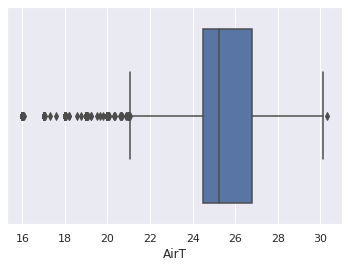

In [15]:
sns.boxplot(x=data['AirT'])

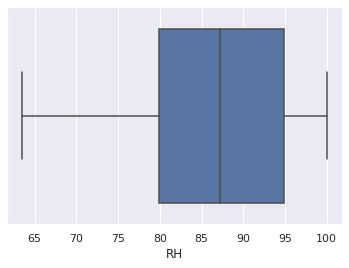

In [16]:
sns.boxplot(x=data['RH'])

In [17]:
data.describe()

,Heater,AC,DrybulbT,Radiation,AirT,RH
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.600000,9.325000,26.111143,255.729677,25.080592,86.824902
std,0.800067,12.356975,2.006523,323.607385,2.626012,9.226681
min,0.000000,0.000000,13.130000,0.000000,16.000000,63.550000
25%,0.000000,0.000000,24.130000,0.000000,24.487500,79.907500
50%,0.000000,0.000000,25.800000,0.000000,25.240000,87.260000
75%,1.000000,24.000000,28.130000,503.759750,26.780000,94.920000
max,2.000000,30.000000,29.410000,845.891000,30.310000,100.000000


In [18]:
# Menentukan nilai IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Heater         1.00000
AC            24.00000
DrybulbT       4.00000
Radiation    503.75975
AirT           2.29250
RH            15.01250
dtype: float64


In [19]:
# # Membuang Outliers
# data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
# data.shape

In [20]:
data.describe()

,Heater,AC,DrybulbT,Radiation,AirT,RH
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.600000,9.325000,26.111143,255.729677,25.080592,86.824902
std,0.800067,12.356975,2.006523,323.607385,2.626012,9.226681
min,0.000000,0.000000,13.130000,0.000000,16.000000,63.550000
25%,0.000000,0.000000,24.130000,0.000000,24.487500,79.907500
50%,0.000000,0.000000,25.800000,0.000000,25.240000,87.260000
75%,1.000000,24.000000,28.130000,503.759750,26.780000,94.920000
max,2.000000,30.000000,29.410000,845.891000,30.310000,100.000000


In [21]:
# # Membuang AC bernilai 0
# data = data[data.AC != 0]

In [22]:
data.describe()

,Heater,AC,DrybulbT,Radiation,AirT,RH
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.600000,9.325000,26.111143,255.729677,25.080592,86.824902
std,0.800067,12.356975,2.006523,323.607385,2.626012,9.226681
min,0.000000,0.000000,13.130000,0.000000,16.000000,63.550000
25%,0.000000,0.000000,24.130000,0.000000,24.487500,79.907500
50%,0.000000,0.000000,25.800000,0.000000,25.240000,87.260000
75%,1.000000,24.000000,28.130000,503.759750,26.780000,94.920000
max,2.000000,30.000000,29.410000,845.891000,30.310000,100.000000


### 9. Plot berbagai fitur terhadap satu sama lain (scatter), terhadap frekuensi (histogram)

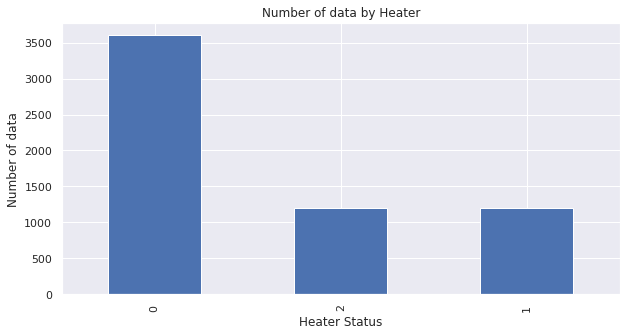

In [23]:
# Menggambar Histogram
data.Heater.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of data by Heater")
plt.ylabel('Number of data')
plt.xlabel('Heater Status');

In [24]:
# Mencari relasi anatara variabel-variabel.
c = pd.DataFrame(data.corr())
c

,Heater,AC,DrybulbT,Radiation,AirT,RH
Heater,1.000000,0.061205,0.001101,-0.000919,0.408547,-0.238307
AC,0.061205,1.000000,0.784458,0.889825,0.003281,0.130681
DrybulbT,0.001101,0.784458,1.000000,0.812937,-0.031406,0.024397
Radiation,-0.000919,0.889825,0.812937,1.000000,-0.159571,0.221198
AirT,0.408547,0.003281,-0.031406,-0.159571,1.000000,-0.541072
RH,-0.238307,0.130681,0.024397,0.221198,-0.541072,1.000000


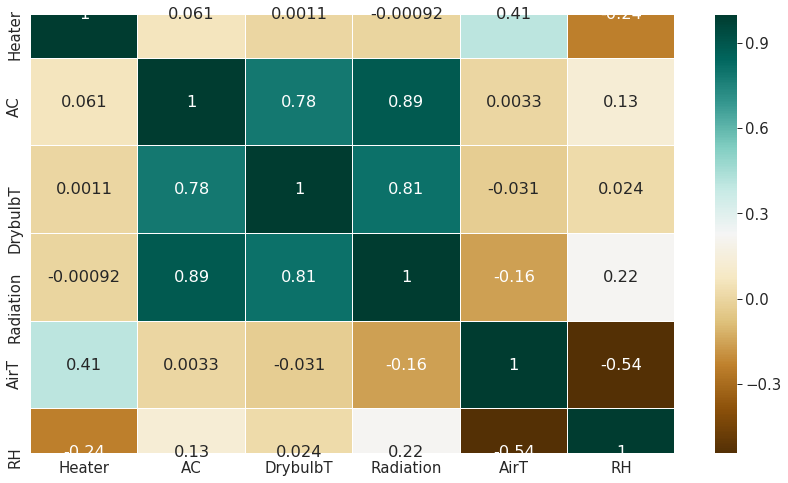

In [25]:
# Heatmaps
sns.set_style('white')
sns.set_context("paper", font_scale=1.7) 
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),cmap="BrBG",annot=True, linewidths=0.1)
plt.tight_layout()

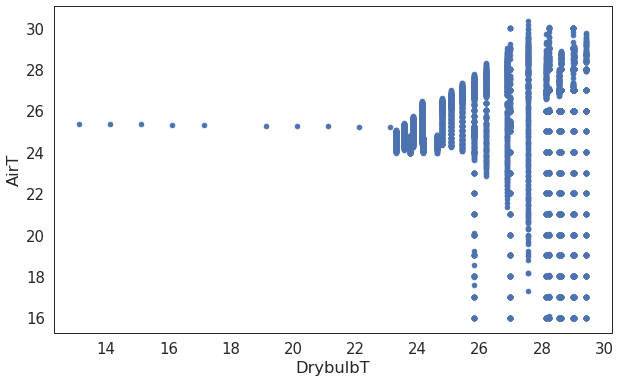

In [26]:
# Menggambar scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data['DrybulbT'], data['AirT'])
ax.set_xlabel('DrybulbT')
ax.set_ylabel('AirT')
plt.show()

## Uji Distribusi dan Normalitas

count    6000.000000
mean       25.080592
std         2.626012
min        16.000000
25%        24.487500
50%        25.240000
75%        26.780000
max        30.310000
Name: AirT, dtype: float64
Kurtosis of normal distribution (should be 0): 2.5782878321120206
Skewness of normal distribution (should be 0): -1.4234254471891516


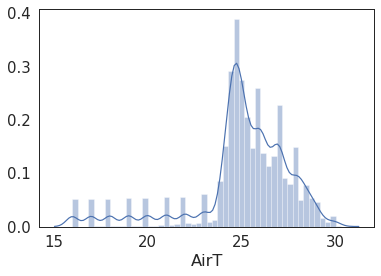

In [27]:
print(data.AirT.describe())

sns.distplot(data.AirT);

stats.normaltest(data.AirT)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(data.AirT)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(data.AirT)))

KURTOSIS: menggambarkan bobot ekor suatu distribusi

Distribusi Normal memiliki kurtosis 0 (mesokurtik) <br/>
Nilai positif memberi tahu Anda bahwa Anda memiliki ekor yang berat (mis. Banyak data di ekor Anda). <br/>
Nilai negatif berarti Anda memiliki ekor ringan (mis. Sedikit data di ekor Anda). <br/>

SKEWNESS:

Jika kemiringan kurang dari -1 atau lebih besar dari 1, distribusinya sangat miring. <br/>
Jika kemiringan antara -1 dan -0,5 atau antara 0,5 dan 1, distribusinya cukup miring. <br/>
Jika kemiringan antara -0,5 dan 0,5, distribusinya kira-kira simetris. <br/>

count    6000.000000
mean       86.824902
std         9.226681
min        63.550000
25%        79.907500
50%        87.260000
75%        94.920000
max       100.000000
Name: RH, dtype: float64
Kurtosis of normal distribution (should be 0): -0.7719012345516574
Skewness of normal distribution (should be 0): -0.32343364674523467


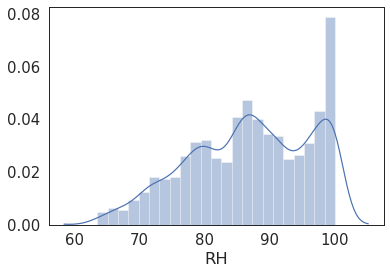

In [28]:
print(data.RH.describe())

sns.distplot(data.RH);

stats.normaltest(data.RH)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(data.RH)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(data.RH)))

count    6000.000000
mean        9.325000
std        12.356975
min         0.000000
25%         0.000000
50%         0.000000
75%        24.000000
max        30.000000
Name: AC, dtype: float64
Kurtosis of normal distribution (should be 0): -1.4542371320399883
Skewness of normal distribution (should be 0): 0.6459947920006208


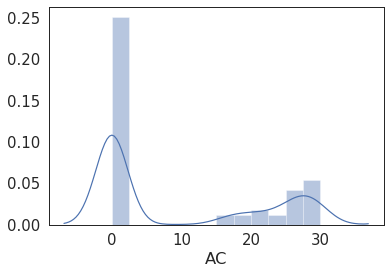

In [29]:
print(data.AC.describe())

sns.distplot(data.AC);

stats.normaltest(data.AC)
#This function tests the null hypothesis that a sample comes from a normal distribution. 
# It is based on D'Agostino and Pearson's test that combines skew and kurtosis to produce
# an omnibus test of normality.
print( 'Kurtosis of normal distribution (should be 0): {}'.format(stats.kurtosis(data.AC)))
print( 'Skewness of normal distribution (should be 0): {}'.format(stats.skew(data.AC)))